<a href="https://colab.research.google.com/github/Pravalika-Jella/News-Article-Classification-Real-fake-/blob/main/News_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Saving fake_and_real_news.csv to fake_and_real_news.csv
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real
Index(['Text', 'label'], dtype='object')
🔹 Logistic Regression Results
Accuracy: 0.9904040404040404
F1 Score: 0.990403562917463
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99       973
        Real       0.99      0.99      0.99      1007

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980


🔹 Naive Bayes Results
Accuracy: 0.9636363636363636
F1 Score: 0.9636332456683212
              precision    recall  f1-score   support


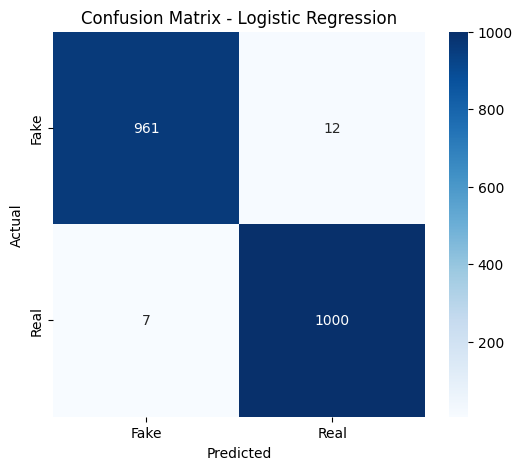

['tfidf_vectorizer.pkl']

In [ ]:

# ===============================
# 1. Install & Import Libraries
# ===============================
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# ===============================
# 2. Load Dataset
# ===============================
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("fake_and_real_news.csv")

print(df.head())
print(df.columns)

# ===============================
# 3. Preprocess the Data
# ===============================

# Features and labels (note: capital "T")
X = df['Text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text cleaning function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

# Vectorization
vectorizer = TfidfVectorizer(max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ===============================
# 4. Train Models
# ===============================
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# ===============================
# 5. Evaluate Models
# ===============================
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print(classification_report(y_test, y_pred_lr))

print("\n🔹 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print(classification_report(y_test, y_pred_nb))

# Confusion matrix plot (Logistic Regression)
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

import joblib

# Save trained logistic regression model
joblib.dump(lr_model, "lr_model.pkl")

# Save trained naive bayes model (optional)
joblib.dump(nb_model, "nb_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")